Import Libraries

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix


Load Dataset

In [ ]:
C_data = pd.read_csv('/content/creditcard.csv')
C_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


Basic Information

In [ ]:
#Basic Information of dataset
C_data.info()
print("\n")

#Number of rows an columns
print(C_data.shape)
print("\n")

#Satistical Measures
print(C_data.describe())
print("\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231766 entries, 0 to 231765
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    231766 non-null  float64
 1   V1      231766 non-null  float64
 2   V2      231766 non-null  float64
 3   V3      231766 non-null  float64
 4   V4      231766 non-null  float64
 5   V5      231766 non-null  float64
 6   V6      231766 non-null  float64
 7   V7      231766 non-null  float64
 8   V8      231766 non-null  float64
 9   V9      231766 non-null  float64
 10  V10     231766 non-null  float64
 11  V11     231766 non-null  float64
 12  V12     231766 non-null  float64
 13  V13     231766 non-null  float64
 14  V14     231766 non-null  float64
 15  V15     231766 non-null  float64
 16  V16     231766 non-null  float64
 17  V17     231766 non-null  float64
 18  V18     231766 non-null  float64
 19  V19     231766 non-null  float64
 20  V20     231766 non-null  float64
 21  V21     23

Exploratory Data Analysis

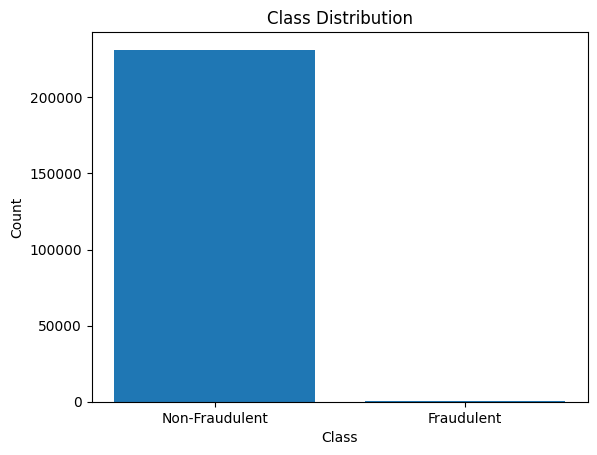

In [55]:
# Check the distribution of the target class (fraudulent vs. non-fraudulent)
class_distribution = C_data['Class'].value_counts()
plt.bar(class_distribution.index, class_distribution.values)
plt.xticks([0, 1], ['Non-Fraudulent', 'Fraudulent'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

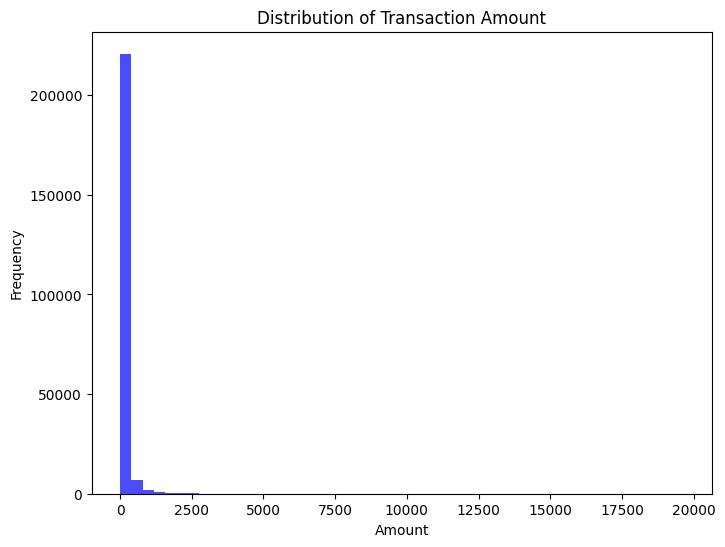

In [58]:
# Visualize the distribution of Amount
plt.figure(figsize=(8, 6))
plt.hist(C_data['Amount'], bins=50, color='blue', alpha=0.7)
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Transaction Amount')
plt.show()


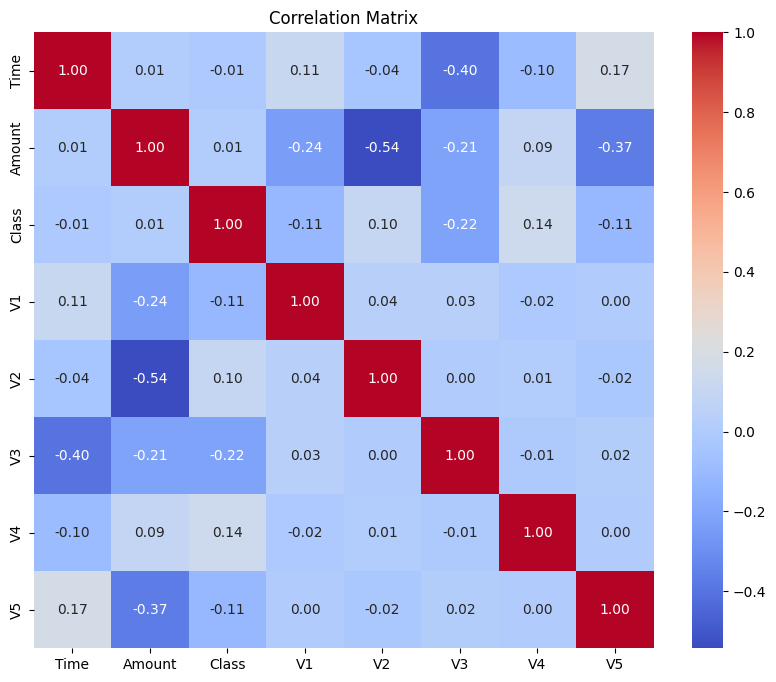

In [60]:
# Calculate and visualize the correlation matrix
correlation_matrix = C_data[['Time', 'Amount', 'Class', 'V1', 'V2', 'V3', 'V4', 'V5']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


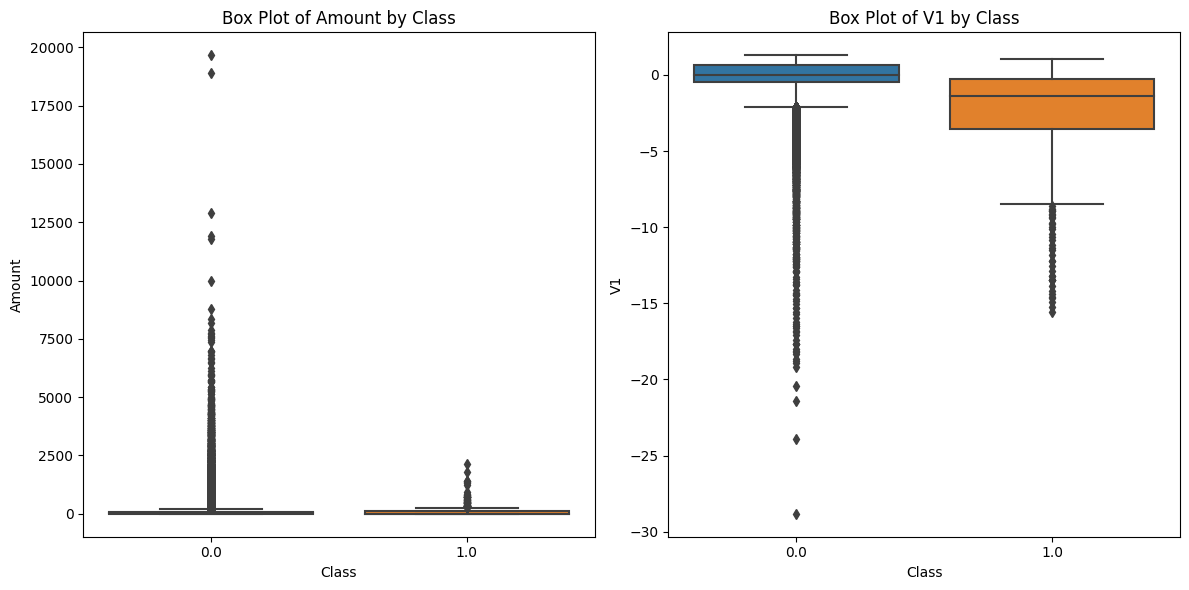

In [61]:
# Create box plots for 'Amount' and 'V1')
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='Class', y='Amount', data=C_data)
plt.title('Box Plot of Amount by Class')

plt.subplot(1, 2, 2)
sns.boxplot(x='Class', y='V1', data=C_data)
plt.title('Box Plot of V1 by Class')

plt.tight_layout()
plt.show()


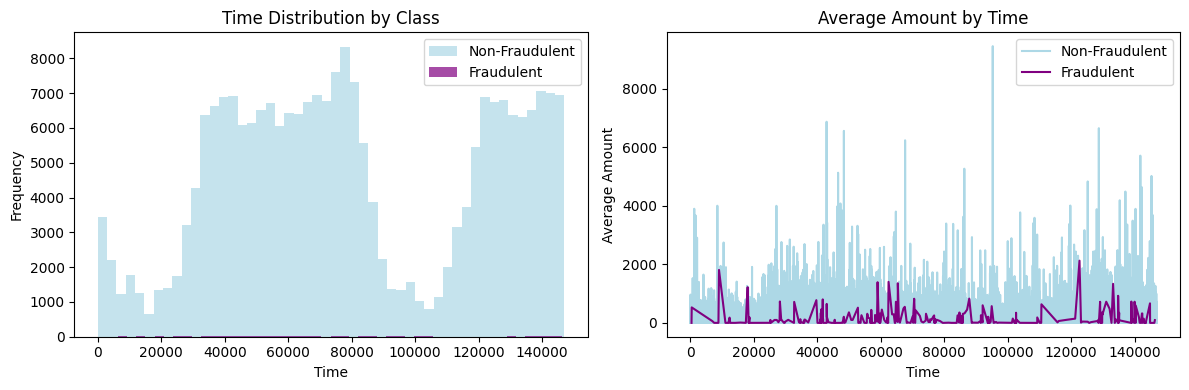

In [65]:
# Analyze time-based patterns (transactions over time)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(C_data[C_data['Class'] == 0]['Time'], bins=50, alpha=0.7, color='lightblue', label='Non-Fraudulent')
plt.hist(C_data[C_data['Class'] == 1]['Time'], bins=50, alpha=0.7, color='purple', label='Fraudulent')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.legend()
plt.title('Time Distribution by Class')

plt.subplot(1, 2, 2)
plt.plot(C_data[C_data['Class'] == 0].groupby('Time')['Amount'].mean(), label='Non-Fraudulent', color='lightblue')
plt.plot(C_data[C_data['Class'] == 1].groupby('Time')['Amount'].mean(), label='Fraudulent', color='purple')
plt.xlabel('Time')
plt.ylabel('Average Amount')
plt.legend()
plt.title('Average Amount by Time')
plt.tight_layout()
plt.show()


Cleaning and Preprocessing Data

In [ ]:

#Check number of missing values in each column
Miss_val= C_data.isnull().sum()
res_C= pd.DataFrame({'No of Missing Values':Miss_val.values,}, index=C_data.columns)
print(res_C)
print("\n")

#Remove missing values
C_data.dropna(inplace=True)

        No of Missing Values
Time                       0
V1                         0
V2                         0
V3                         0
V4                         0
V5                         0
V6                         0
V7                         0
V8                         0
V9                         0
V10                        0
V11                        0
V12                        0
V13                        0
V14                        0
V15                        0
V16                        0
V17                        0
V18                        0
V19                        0
V20                        0
V21                        0
V22                        0
V23                        0
V24                        0
V25                        0
V26                        0
V27                        1
V28                        1
Amount                     1
Class                      1




Fradulant and Non_Fradulant Transactions


In [ ]:
# Normalize features (v1 to v28)
scaler = StandardScaler()
C_data.iloc[:, 1:29] = scaler.fit_transform(C_data.iloc[:, 1:29])

#Comparing values
print(C_data['Class'].value_counts())
print("\n")


0.0    231344
1.0       421
Name: Class, dtype: int64




Handling Class Imbalance using smote

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# Split the data into features and target variable
X = C_data.iloc[:, 1:29]
y = C_data['Class']

# Apply random undersampling to balance classes
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

# Check the class distribution after undersampling
print(pd.Series(y_resampled).value_counts())


0.0    421
1.0    421
Name: Class, dtype: int64


Splitting data to training and testing sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


Training ad Evaluating Models

In [ ]:
# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Support Vector Machine': SVC()
}

# Train and evaluate models
for model_name, model in models.items():
    model.fit(X_resampled, y_resampled)
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)

    # Print results
    print(f'Model: {model_name}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1-score: {f1}')
    print(f'Accuracy: {accuracy}')
    print(f'Confusion Matrix:\n{confusion}')
    print()

Model: Logistic Regression
Precision: 0.975609756097561
Recall: 0.9411764705882353
F1-score: 0.9580838323353293
Accuracy: 0.9585798816568047
Confusion Matrix:
[[82  2]
 [ 5 80]]

Model: Random Forest
Precision: 1.0
Recall: 1.0
F1-score: 1.0
Accuracy: 1.0
Confusion Matrix:
[[84  0]
 [ 0 85]]

Model: Support Vector Machine
Precision: 1.0
Recall: 0.8941176470588236
F1-score: 0.9440993788819877
Accuracy: 0.9467455621301775
Confusion Matrix:
[[84  0]
 [ 9 76]]

